In [93]:
import numpy as np
import geopandas as gpd
import pandas as pd
from scipy import stats
from scipy.stats import kruskal, pearsonr, ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

# Load in Data

In [2]:
housing = pd.read_csv('data/msa_med_housing_2011-2020.csv')

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CBSAA        907 non-null    int64 
 1   NAME_E.y     907 non-null    object
 2   housing_chg  907 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 21.4+ KB


In [3]:
housing.head()

,CBSAA,NAME_E.y,housing_chg
0,10100,"Aberdeen, SD Micro Area",26700
1,10140,"Aberdeen, WA Micro Area",34300
2,10180,"Abilene, TX Metro Area",30900
3,10220,"Ada, OK Micro Area",26900
4,10300,"Adrian, MI Micro Area",28100


In [31]:
flows = pd.read_csv('data/sea_mig_2020.csv')

In [32]:
flows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEOID1      354 non-null    int64  
 1   GEOID2      344 non-null    float64
 2   FULL1_NAME  354 non-null    object 
 3   FULL2_NAME  354 non-null    object 
 4   variable    354 non-null    object 
 5   estimate    345 non-null    float64
 6   moe         308 non-null    float64
 7   centroid1   354 non-null    object 
 8   centroid2   354 non-null    object 
 9   j           354 non-null    object 
 10  k           354 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 30.6+ KB


In [33]:
# remove NAs
flows = flows[flows['estimate'].notna()]

In [34]:
flows.head()

,GEOID1,GEOID2,FULL1_NAME,FULL2_NAME,variable,estimate,moe,centroid1,centroid2,j,k
0,42660,NaN,"Seattle-Tacoma-Bellevue, WA Metro Area",Outside Metro Area within U.S. or Puerto Rico,MOVEDOUT,25243.0,1528.0,c(-121.881387433741,47.5574033466574),c(NA,NA)
10,42660,10180.0,"Seattle-Tacoma-Bellevue, WA Metro Area","Abilene, TX Metro Area",MOVEDOUT,48.0,34.0,c(-121.881387433741,c(-99.717678358008,c(-99.717678358008,32.4496900313019)
11,42660,10380.0,"Seattle-Tacoma-Bellevue, WA Metro Area","Aguadilla-Isabela, PR Metro Area",MOVEDOUT,0.0,NaN,c(-121.881387433741,c(-67.0703611537066,c(-67.0703611537066,18.3797715984677)
12,42660,10420.0,"Seattle-Tacoma-Bellevue, WA Metro Area","Akron, OH Metro Area",MOVEDOUT,49.0,45.0,c(-121.881387433741,c(-81.3495122130132,c(-81.3495122130132,41.1487250686295)
13,42660,10500.0,"Seattle-Tacoma-Bellevue, WA Metro Area","Albany, GA Metro Area",MOVEDOUT,0.0,NaN,c(-121.881387433741,c(-84.1738860941887,c(-84.1738860941887,31.5895065709885)


In [105]:
race = pd.read_csv('data/race_2010-2020.csv')

In [106]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GISJOIN                366 non-null    object 
 1   CBSA                   366 non-null    object 
 2   chg_white_2010_2020    366 non-null    float64
 3   chg_black_2010_2020    366 non-null    float64
 4   chg_aiak_2010_2020     366 non-null    float64
 5   chg_asian_2010_2020    366 non-null    float64
 6   chg_nhpi_2010_2020     366 non-null    float64
 7   chg_other_2010_2020    366 non-null    float64
 8   chg_twoplus_2010_2020  366 non-null    float64
dtypes: float64(7), object(2)
memory usage: 25.9+ KB


In [107]:
race.head()

,GISJOIN,CBSA,chg_white_2010_2020,chg_black_2010_2020,chg_aiak_2010_2020,chg_asian_2010_2020,chg_nhpi_2010_2020,chg_other_2010_2020,chg_twoplus_2010_2020
0,G10180,"Abilene, TX Metro Area",-7227.00,1744.0,378.00,882.0,71.0,720.00,14759.00
1,G10420,"Akron, OH Metro Area",-44830.06,2956.0,16.00,11856.0,33.0,3644.00,25339.00
2,G10500,"Albany, GA Metro Area",-6800.00,-2698.0,-50.00,214.0,-93.0,727.00,3190.00
3,G10580,"Albany-Schenectady-Troy, NY Metro Area",-55989.00,10391.0,860.00,19116.0,137.0,10079.00,43952.00
4,G10740,"Albuquerque, NM Metro Area",-133717.88,2035.0,8164.01,5374.0,201.0,-3535.04,150928.83


In [46]:
race_pcts = pd.read_csv('data/race_2010-2020_pcts.csv')

In [47]:
race_pcts.head()

,GISJOIN,CBSA,chg_white_2010_2020,chg_black_2010_2020,chg_aiak_2010_2020,chg_asian_2010_2020,chg_nhpi_2010_2020,chg_other_2010_2020,chg_twoplus_2010_2020
0,G10180,"Abilene, TX Metro Area",-5.495483,14.313854,34.870849,39.927569,53.787879,5.426590,303.246353
1,G10420,"Akron, OH Metro Area",-7.657721,3.485561,1.220442,83.551797,19.075145,120.862355,177.431552
2,G10500,"Albany, GA Metro Area",-9.705551,-3.289081,-13.586957,14.449696,-62.837838,53.931751,170.497060
3,G10580,"Albany-Schenectady-Troy, NY Metro Area",-7.574310,15.425840,41.505792,70.300088,47.735192,76.205958,205.556075
4,G10740,"Albuquerque, NM Metro Area",-21.650195,8.571308,15.703945,29.982147,21.682848,-2.588502,394.059763


# Basic Plotting

In [ ]:
plt.plot()

In [37]:
stats.describe(np.array(flows['estimate']))

DescribeResult(nobs=345, minmax=(0.0, 25243.0), mean=456.71014492753625, variance=2753845.8343444555, skewness=10.665841656628476, kurtosis=145.59969358746895)

# Basic Stats

## Race Data

### Raw

In [108]:
chg_white = race['chg_white_2010_2020']
chg_black = race['chg_black_2010_2020']
chg_aiak = race['chg_aiak_2010_2020']
chg_asian = race['chg_asian_2010_2020']
chg_other = race['chg_other_2010_2020']
chg_twoplus = race['chg_twoplus_2010_2020']

<function matplotlib.pyplot.show(close=None, block=None)>

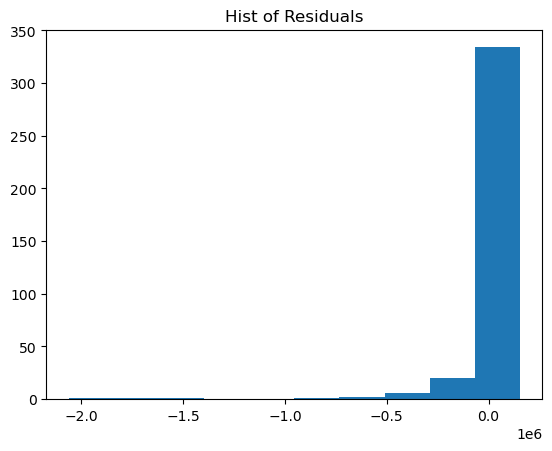

In [109]:
test_model = ols('chg_white_2010_2020 ~ chg_black_2010_2020', data = race).fit()
residuals = test_model.resid

# not normal for regressing change in white on change in Black
plt.hist(residuals, bins=10)
plt.title('Hist of Residuals')
plt.show

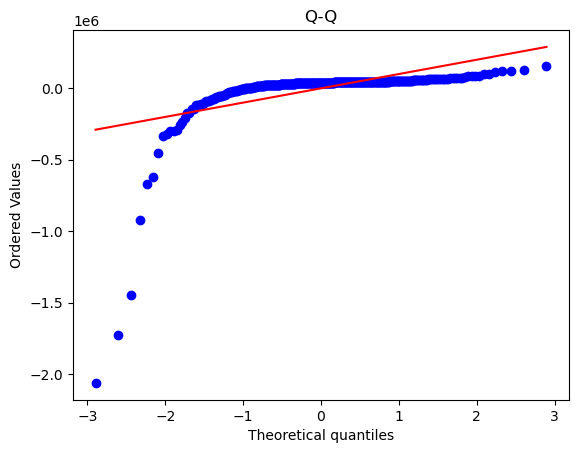

In [110]:
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q')
plt.show()

### Percentages

In [111]:
# significant difference in variances...
chg_white = race_pcts['chg_white_2010_2020']
chg_black = race_pcts['chg_black_2010_2020']
chg_aiak = race_pcts['chg_aiak_2010_2020']
chg_asian = race_pcts['chg_asian_2010_2020']
chg_other = race_pcts['chg_other_2010_2020']
chg_twoplus = race_pcts['chg_twoplus_2010_2020']

(array([  5.,   0.,   4.,  18.,  18.,  97., 158.,  50.,  14.,   2.]),
 array([-55.90780592, -47.73352221, -39.55923849, -31.38495478,
        -23.21067107, -15.03638735,  -6.86210364,   1.31218008,
          9.48646379,  17.66074751,  25.83503122]),
 <BarContainer object of 10 artists>)

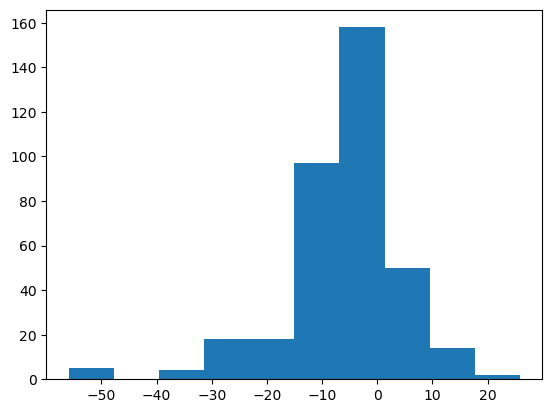

In [112]:
plt.hist(chg_white)

(array([224., 114.,  20.,   3.,   2.,   1.,   0.,   1.,   0.,   1.]),
 array([-24.44136497,  13.59149457,  51.62435412,  89.65721367,
        127.69007322, 165.72293277, 203.75579232, 241.78865187,
        279.82151142, 317.85437097, 355.88723051]),
 <BarContainer object of 10 artists>)

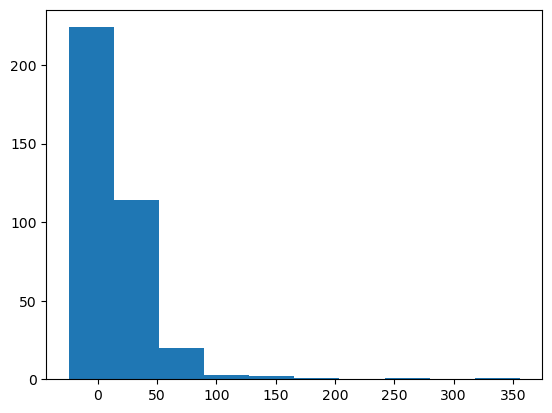

In [114]:
plt.hist(chg_black)

(array([ 81., 177.,  74.,  22.,   7.,   3.,   0.,   1.,   0.,   1.]),
 array([ -6.92041522,  18.47750865,  43.87543253,  69.2733564 ,
         94.67128028, 120.06920415, 145.46712803, 170.8650519 ,
        196.26297578, 221.66089965, 247.05882353]),
 <BarContainer object of 10 artists>)

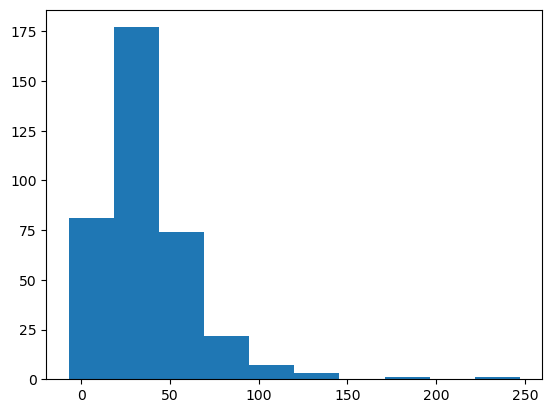

In [115]:
plt.hist(chg_asian)

(array([ 56., 148.,  86.,  50.,  16.,   5.,   4.,   0.,   0.,   1.]),
 array([-22.51332149,   2.00239254,  26.51810658,  51.03382061,
         75.54953464, 100.06524868, 124.58096271, 149.09667675,
        173.61239078, 198.12810482, 222.64381885]),
 <BarContainer object of 10 artists>)

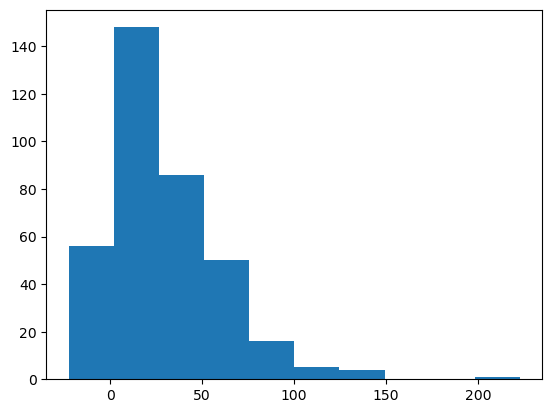

In [116]:
plt.hist(chg_aiak)

In [59]:
seattle = race_pcts[race_pcts['CBSA'] == 'Seattle-Tacoma-Bellevue, WA Metro Area'].reset_index()

In [60]:
seattle

,index,GISJOIN,CBSA,chg_white_2010_2020,chg_black_2010_2020,chg_aiak_2010_2020,chg_asian_2010_2020,chg_nhpi_2010_2020,chg_other_2010_2020,chg_twoplus_2010_2020
0,310,G42660,"Seattle-Tacoma-Bellevue, WA Metro Area",-2.405787,28.546552,15.850403,57.114571,55.560282,61.212283,140.050346


In [61]:
# anova to analyze change in racial composition for metro areas
changes = [seattle['chg_white_2010_2020'][0], seattle['chg_black_2010_2020'][0], seattle['chg_aiak_2010_2020'][0],
          seattle['chg_asian_2010_2020'][0], seattle['chg_nhpi_2010_2020'][0], seattle['chg_other_2010_2020'][0],
          seattle['chg_twoplus_2010_2020'][0]]

In [62]:
changes

[-2.40578674821084,
 28.5465522720051,
 15.8504033243706,
 57.1145711660954,
 55.5602821794463,
 61.2122832579393,
 140.05034590032]

In [63]:
groups = ["White", "Black", "American Indian-Alaska Native", "Asian", "Native Hawaiian-Pacific Islander", "Other", "Two or More"]

In [71]:
sea_data = pd.DataFrame({
    'Group': groups,
    'Change': changes
})

In [69]:
sea_data['Group'] = sea_data['Group'].astype('category')

<function matplotlib.pyplot.show(close=None, block=None)>

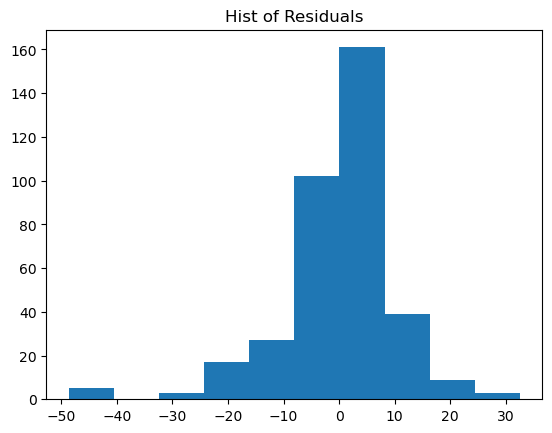

In [81]:
test_model = ols('chg_white_2010_2020 ~ chg_black_2010_2020', data = race_pcts).fit()
residuals = test_model.resid

# near normal residuals for regressing change in white on change in Black
plt.hist(residuals, bins=10)
plt.title('Hist of Residuals')
plt.show

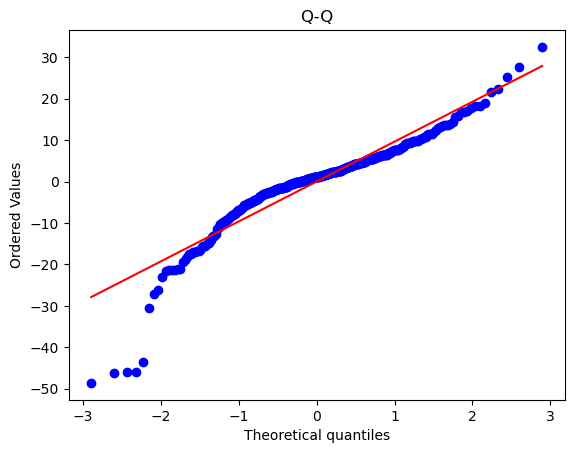

In [82]:
# QQ plot
# pretty good...
stats.probplot(residuals, dist='norm', plot=plt)
plt.title('Q-Q')
plt.show()

In [83]:
# shapiro test to statistically check for normality
shapiro_test = stats.shapiro(residuals)
print(shapiro_test.pvalue)

2.2077111206465815e-15


In [94]:
# levene test to check equal variance
res = stats.levene(chg_white, chg_black)
res.pvalue

2.9810688948037424e-09

In [89]:
# positively associated, statistically significant
print(pearsonr(chg_white, chg_black))

PearsonRResult(statistic=0.3157788985218049, pvalue=6.436220420850656e-10)


In [95]:
# statistically significant difference between change in white and change in black pops
print(ttest_ind(chg_white, chg_black))

TtestResult(statistic=-12.253867467564197, pvalue=1.583582406997581e-31, df=730.0)


[Text(1, 0, 'White'), Text(2, 0, 'Black')]

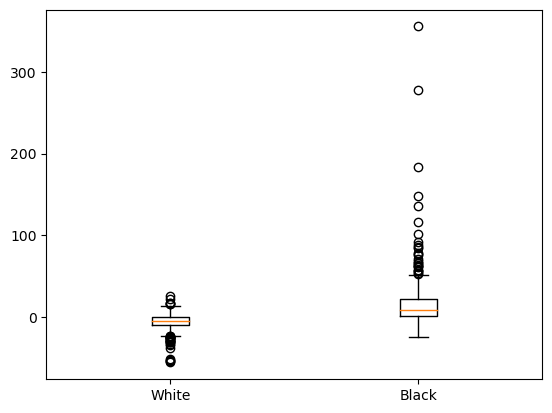

In [100]:
wb_dict = {'White': chg_white, 'Black': chg_black}

fig, ax = plt.subplots()
ax.boxplot(wb_dict.values())
ax.set_xticklabels(wb_dict.keys())

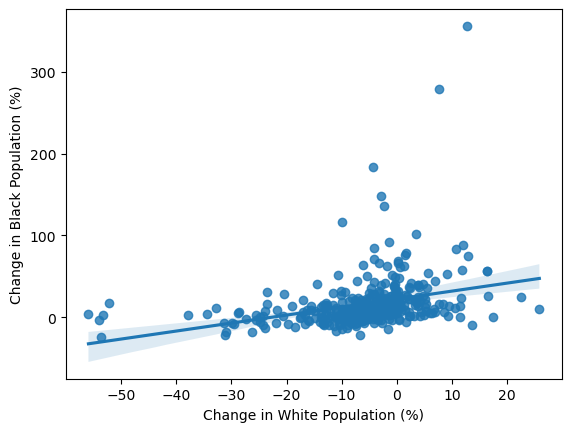

In [90]:
# we have some outliers...
sns.regplot(x=chg_white, y=chg_black)
plt.xlabel('Change in White Population (%)')
plt.ylabel('Change in Black Population (%)')
plt.show()

In [91]:
#model = ols('Change ~ Group', data = sea_data).fit(cov_type='HC3')
# no luck with anova... kruskal-wallis test
#anova_table = sm.stats.anova_lm(model, typ = 2)

#print(anova_table)